# **Advertisement Success Prediction**

***SHOWBIZ***

*Company inroduction*

Your client for this project is an Advertisement Production Company.

They want to produce good quality, precise advertisements to increase more engagement when the item/product is sold.

They have experience in producing high-quality ads for various ranges of products being sold in different parts of the world

The major cities in which it provides services are Mumbai, Delhi, Hyderabad and Bangalore. They launched their services in 2000

To find useful insights for better ad production, they need to analyze different parameters of their previous ads

*Current Scenario*

They have a collection of different instances of advertisements of different products aired in different countries.

They don’t have any means to predict the success of a future advertisement and there is a requirement to automate this process.

However, Designing a computer program to do this turns out to be a bit trickier.

Currently, the organization is keeping track by manually assigning surge prices to its customers.

The current process suffers from the following problems:

There are various factors responsible for deciding whether an advertisement will gain profit or not.

Analyzing those factors and drawing useful insights from it to produce more precise advertisements accordingly requires too many considerations.

This becomes quite a challenging and time-consuming task

The company has hired you as a data science consultant.

They want to automate the process of accurately predicting whether an advertisement will incur a gain when sold or not

*Your Role*

You are given a dataset containing information about various advertisements.

Your task is to build a classification model using the dataset.

Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

***Project Deliverables***

Deliverable: **Predict whether an ad will be profitable or not**

Machine Learning Task: **Classification**

Target Variable:**netgain**

Win Condition: N/A (best possible model)

***Evaluation Metric***

The model evaluation will be based on the **Accuracy score**.

The dataset contains all the necessary information about the different types of ads and it’s netgain.

The column netgain is also present in the dataset which is a measure of the overall gain from the ad.

This is the data that we have to predict for future samples.

The dataset is divided into two parts: Train, and Test sets.

**Train Set:**

The *train set contains 20838 rows and 12 columns.*

The last column netgain is the target variable.

**Test Set:**

The *test set contains 5210 rows and 11 columns.*


**Dataset Feature Description**

The Dataset contains the following columns:


Column Name and its Description  

**Id**	Unique ID.

**Realtionship_status**	If the person is married, divorced or never married.

**Industry**	Type of industry.

**Genre** Type of genre.

**Targeted_sex**	Targeted sex of the audience.

**average_runtime(minutes_per_week)**	Runtime per week.

**airtime** airtime of the ad.

**airlocation**	Location of the ad aired.

**Ratings**	Ratings of the ad.

**Expensive**	If it is expensive or not.

**money_back_guarantee**	If there is money back guarantee or not.

**Netgain**	If there will be profit or not.

In [1]:
! pip install pandas
! pip install numpy
! pip install python -m venv sklearn-env
! pip install -U scikit-learn


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 44.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving adv_train.csv to adv_train.csv


In [5]:
import io
df_train = pd.read_csv(io.BytesIO(uploaded['adv_train.csv']))

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20838 entries, 0 to 20837
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 20838 non-null  int64  
 1   realtionship_status                20838 non-null  object 
 2   industry                           20838 non-null  object 
 3   genre                              20838 non-null  object 
 4   targeted_sex                       20838 non-null  object 
 5   average_runtime(minutes_per_week)  20838 non-null  int64  
 6   airtime                            20838 non-null  object 
 7   airlocation                        20838 non-null  object 
 8   ratings                            20838 non-null  float64
 9   expensive                          20838 non-null  object 
 10  money_back_guarantee               20838 non-null  object 
 11  netgain                            20838 non-null  int

In [7]:
df_train.describe()

,id,average_runtime(minutes_per_week),ratings,netgain
count,20838.000000,20838.000000,20838.000000,20838.000000
mean,16232.299405,40.227949,0.038679,0.238555
std,9382.648210,12.478874,0.075201,0.426210
min,2.000000,1.000000,0.000000,0.000000
25%,8085.250000,40.000000,0.027465,0.000000
50%,16154.000000,40.000000,0.027465,0.000000
75%,24314.500000,45.000000,0.027465,0.000000
max,32561.000000,99.000000,1.000000,1.000000


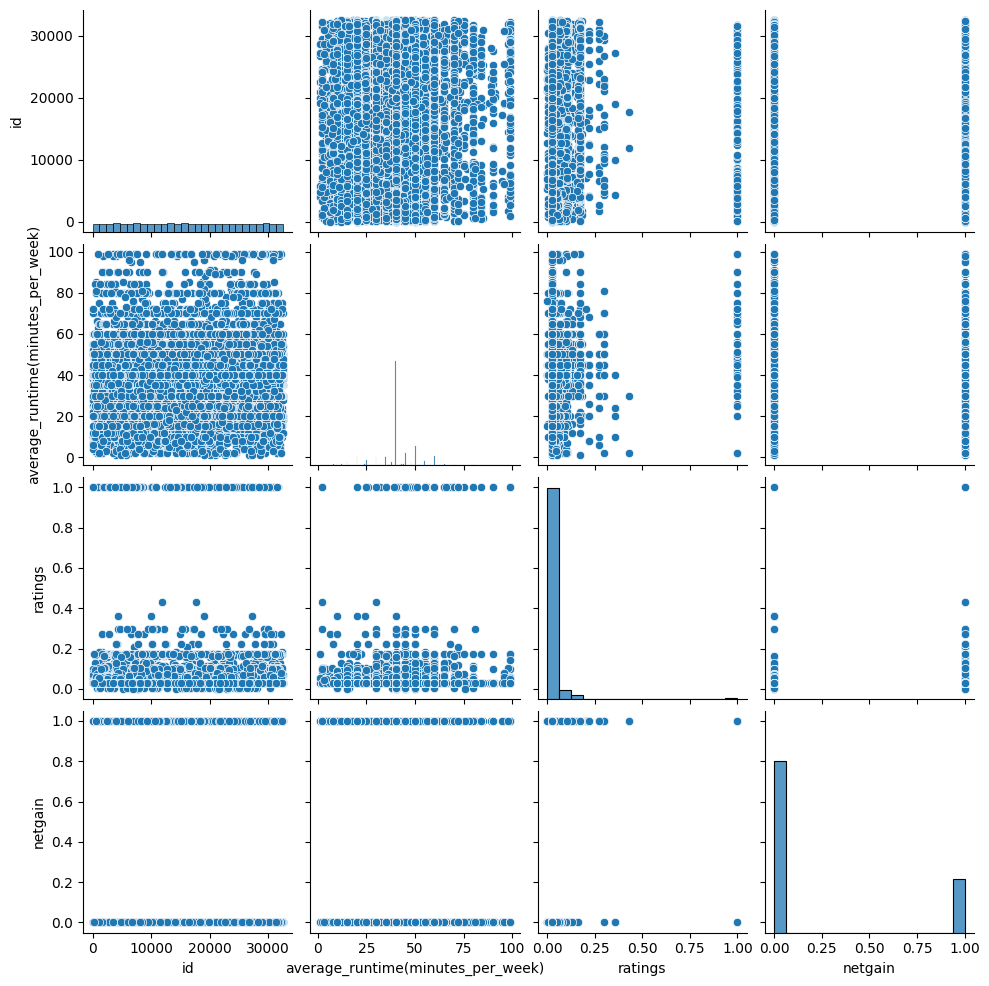

In [8]:
sns.pairplot(df_train)

In [15]:
print('Shape of the given dataset: ', df_train.shape)
df_train.head(3)

Shape of the given dataset:  (20838, 12)


,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,28237,Never-married,Political,Comedy,Male,50,Morning,United-States,0.027465,Low,No,0
1,24181,Married-civ-spouse,Pharma,Comedy,Male,25,Daytime,United-States,0.064596,Low,No,0
2,22514,Never-married,Political,Comedy,Male,40,Morning,United-States,0.027465,Low,Yes,0


<Axes: xlabel='netgain', ylabel='Density'>

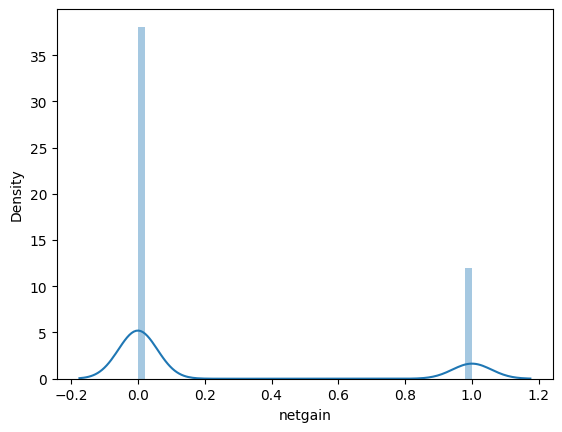

In [19]:
sns.distplot(df_train['netgain'], kde = True)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [24]:
df_train.columns

Index(['id', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [25]:
df_train_num= df_train[['id','average_runtime(minutes_per_week)','ratings', 'netgain']]

In [28]:
df_train_cat = df_train.drop(['id','average_runtime(minutes_per_week)','ratings', 'netgain'], axis = 1)

In [31]:
df_train_cat = df_train_cat.apply(LabelEncoder().fit_transform)

In [33]:
df_train_cat.head(2)

,realtionship_status,industry,genre,targeted_sex,airtime,airlocation,expensive,money_back_guarantee
0,4,5,0,1,1,39,1,0
1,2,4,0,1,0,39,1,0


In [34]:
data_final = pd.concat([df_train_cat, df_train_num], axis = 1)

In [36]:
data_final = data_final[['id', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain']]

In [38]:
data_final.shape

(20838, 12)

In [41]:
data_final.head(3)

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,28237,4,5,0,1,50,1,39,0.027465,1,0,0
1,24181,2,4,0,1,25,0,39,0.064596,1,0,0
2,22514,4,5,0,1,40,1,39,0.027465,1,1,0


In [43]:
data_features = data_final.drop('netgain', axis = 1)                  # Feature/Independent Variable
data_target = data_final['netgain']                                 # Target/ Dependent Variable

In [45]:
data_features.head(1)

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,28237,4,5,0,1,50,1,39,0.027465,1,0


In [46]:
data_target.head(1)

,netgain
0,0


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, test_size=0.2, random_state=0)

In [48]:
print('Train cases as below')          # Print the shape of Train and Test data
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (16670, 11)
y_train shape:  (16670,)

Test cases as below
X_test shape:  (4168, 11)
y_test shape:  (4168,)


In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [53]:
feature = X_train.drop('id', axis= 1)
numeric_features = feature.columns
numeric_features

Index(['realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee'],
      dtype='object')

In [54]:
X_train[numeric_features] = sc.fit_transform(X_train[numeric_features])

In [55]:
X_test[numeric_features] = sc.transform(X_test[numeric_features])

In [56]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC
from xgboost import XGBClassifier

In [65]:
lr= LogisticRegression()
d_tree = DecisionTreeClassifier(max_leaf_nodes=10, max_features= "sqrt", max_depth=12, min_samples_split=5, min_samples_leaf=4)
rfc= RandomForestClassifier(n_estimators = 20, random_state = 4)
svc = SVC(random_state=101)
knn = KNeighborsClassifier(n_neighbors = 3)
xgb = XGBClassifier(random_state=101)
ab = AdaBoostClassifier(n_estimators=50, random_state=101)
gb = GradientBoostingClassifier(random_state=101)

In [66]:
print('Linear Regression: ', lr.fit(X_train, y_train))
print('Decision Tree: ', d_tree.fit(X_train, y_train))
print('Random Forest: ', rfc.fit(X_train, y_train))
print('SVC: ', svc.fit(X_train, y_train))
print('KNN: ', knn.fit(X_train, y_train))
print('XGB: ', xgb.fit(X_train, y_train))
print('AdaB: ', ab.fit(X_train, y_train))
print('GB: ', gb.fit(X_train, y_train))

Linear Regression:  LogisticRegression()
Decision Tree:  DecisionTreeClassifier(max_depth=12, max_features='sqrt', max_leaf_nodes=10,
                       min_samples_leaf=4, min_samples_split=5)
Random Forest:  RandomForestClassifier(n_estimators=20, random_state=4)
SVC:  SVC(random_state=101)
KNN:  KNeighborsClassifier(n_neighbors=3)
XGB:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strat

In [67]:
pred_lr = lr.predict(X_train)
pred_dt = d_tree.predict(X_train)
pred_rf = rfc.predict(X_train)
pred_svc = svc.predict(X_train)
pred_knn = knn.predict(X_train)
pred_xgb = xgb.predict(X_train)
pred_ab = ab.predict(X_train)
pred_gb = gb.predict(X_train)

In [68]:
pred_lr_test = lr.predict(X_test)
pred_dt_test = d_tree.predict(X_test)
pred_rf_test = rfc.predict(X_test)
pred_svc_test = svc.predict(X_test)
pred_knn_test = knn.predict(X_test)
pred_xgb_test = xgb.predict(X_test)
pred_ab_test = ab.predict(X_test)
pred_gb_test = gb.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [69]:
print('Logistic Regression:') # LR
print('Accuracy Score of trained set: ',accuracy_score(pred_lr, y_train))
print('Accuracy Score of test set: ',accuracy_score(pred_lr_test, y_test))
print()
print('Decision Tree:')  # DT
print('Accuracy Score of trained set: ',accuracy_score(pred_dt, y_train))
print('Accuracy Score of test set: ',accuracy_score(pred_dt_test, y_test))
print()
print('Random Forest:')   # RF
print('Accuracy Score of trained set: ',accuracy_score(pred_rf, y_train))
print('Accuracy Score of test set: ',accuracy_score(pred_rf_test, y_test))
print()
print('SVC:') #SVC
print('Accuracy Score of trained set: ',accuracy_score(pred_svc, y_train))
print('Accuracy Score of test set: ',accuracy_score(pred_svc_test, y_test))
print()
print('K-Nearest Neighbour:') # KNN
print('Accuracy Score of trained set: ',accuracy_score(pred_knn, y_train))
print('Accuracy Score of test set: ',accuracy_score(pred_knn_test, y_test))
print()
print('XG Booster:') #XGB
print('Accuracy Score of trained set: ',accuracy_score(pred_xgb, y_train))
print('Accuracy Score of test set: ',accuracy_score(pred_xgb_test, y_test))
print()
print('ADA Booster:') #AB
print('Accuracy Score of trained set: ',accuracy_score(pred_ab, y_train))
print('Accuracy Score of test set: ',accuracy_score(pred_ab_test, y_test))
print()
print('Gradient Booster:') #GB
print('Accuracy Score of trained set: ',accuracy_score(pred_gb, y_train))
print('Accuracy Score of test set: ',accuracy_score(pred_gb_test, y_test))

Logistic Regression:
Accuracy Score of trained set:  0.7952609478104379
Accuracy Score of test set:  0.7922264875239923

Decision Tree:
Accuracy Score of trained set:  0.8082783443311338
Accuracy Score of test set:  0.8025431861804223

Random Forest:
Accuracy Score of trained set:  0.9920215956808638
Accuracy Score of test set:  0.783109404990403

SVC:
Accuracy Score of trained set:  0.7628074385122975
Accuracy Score of test set:  0.7559980806142035

K-Nearest Neighbour:
Accuracy Score of trained set:  0.8262147570485903
Accuracy Score of test set:  0.6828214971209213

XG Booster:
Accuracy Score of trained set:  0.865746850629874
Accuracy Score of test set:  0.7994241842610365

ADA Booster:
Accuracy Score of trained set:  0.820755848830234
Accuracy Score of test set:  0.8059021113243762

Gradient Booster:
Accuracy Score of trained set:  0.8262747450509899
Accuracy Score of test set:  0.8078214971209213


In [70]:
print('Logistic Regression:')
print(classification_report(pred_lr_test, y_test))
print()
print('Decision Tree:')
print(classification_report(pred_dt_test, y_test))
print()
print('Random Forest:')
print(classification_report(pred_rf_test, y_test))
print()
print('K-Nearest Neighbour:')
print(classification_report(pred_knn_test, y_test))
print()
print('SVC:')
print(classification_report(pred_svc_test, y_test))
print()
print('XGB:')
print(classification_report(pred_xgb_test, y_test))
print()
print('ADA Booster:')
print(classification_report(pred_ab_test, y_test))
print()
print('Gradient Booster:')
print(classification_report(pred_gb_test, y_test))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.79      0.88      3881
           1       0.22      0.76      0.34       287

    accuracy                           0.79      4168
   macro avg       0.60      0.78      0.61      4168
weighted avg       0.93      0.79      0.84      4168


Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      3948
           1       0.20      0.94      0.33       220

    accuracy                           0.80      4168
   macro avg       0.60      0.87      0.61      4168
weighted avg       0.95      0.80      0.86      4168


Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      3315
           1       0.47      0.57      0.52       853

    accuracy                           0.78      4168
   macro avg       0.68      0.70      0.69      4168
weighted avg       0.

In [71]:
from sklearn.model_selection import cross_val_score

In [73]:
def evulate_model(model, X, y):
    cv = cross_val_score(model, X, y, cv = 5)
    print(cv)
    print(cv.mean())

In [74]:
print("Logistic regression")
evulate_model(lr, X_train, y_train)
print()
print("DECISION TREE")
evulate_model(d_tree, X_train, y_train)
print()
print("Random forest classifier")
evulate_model(rfc, X_train, y_train)
print()
print("K-Nearest Neighbour")
evulate_model(knn, X_train, y_train)
print()
print("Support Vector Classifier")
evulate_model(svc, X_train, y_train)
print()
print("XG Booster Classifier")
evulate_model(xgb, X_train, y_train)
print()
print("ADA Booster Classifier")
evulate_model(ab, X_train, y_train)
print()
print("Gradient Boosting Classifier")
evulate_model(gb, X_train, y_train)

Logistic regression
[0.79394121 0.79814037 0.79514097 0.79964007 0.79574085]
0.796520695860828

DECISION TREE
[0.80863827 0.80203959 0.80143971 0.80743851 0.77264547]
0.7984403119376126

Random forest classifier
[0.79694061 0.79694061 0.80053989 0.79934013 0.79424115]
0.7976004799040192

K-Nearest Neighbour
[0.69166167 0.68206359 0.69796041 0.69436113 0.68686263]
0.6905818836232752

Support Vector Classifier
[0.76274745 0.76274745 0.76274745 0.76274745 0.76304739]
0.7628074385122975

XG Booster Classifier
[0.81283743 0.81703659 0.81463707 0.81343731 0.80623875]
0.8128374325134973

ADA Booster Classifier
[0.81883623 0.82033593 0.82543491 0.81253749 0.81793641]
0.8190161967606479

Gradient Boosting Classifier
[0.82063587 0.82003599 0.82783443 0.81553689 0.82153569]
0.8211157768446309


In [75]:
from sklearn.model_selection import GridSearchCV
grid = {        'n_estimators': [10, 20, 40, 60, 100, 150, 200],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [2,3,5,10,20],
                'bootstrap': [True, False]
                }
rf_clf = RandomForestClassifier()
rf_random = GridSearchCV(estimator = rf_clf, param_grid = grid, cv = 3, verbose=1, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 140 candidates, totalling 420 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 20, 40, 60, 100, 150, 200]},
             verbose=1)

In [76]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=250, learning_rate = learning_rate, max_features=2, max_depth = 3, random_state = 7)
    gb.fit(X_train, y_train)

In [77]:
rf_random.score(X_train, y_train)

0.8308938212357528

In [78]:
gb.score(X_train, y_train)

0.8499700059988002

# **Working on Test dataset**

In [79]:
from google.colab import files
uploaded = files.upload()

Saving adv_test.csv to adv_test.csv


In [80]:
import io
df_test = pd.read_csv(io.BytesIO(uploaded['adv_test.csv']))

In [82]:
print('Shape of the Test dataset: ', df_test.shape)
df_test.head(3)

Shape of the Test dataset:  (5210, 11)


,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,23855,Never-married,Political,Comedy,Female,40,Morning,United-States,0.027465,High,Yes
1,3068,Never-married,Auto,Comedy,Male,40,Primetime,United-States,0.027465,Low,Yes
2,4230,Divorced,Auto,Comedy,Female,30,Primetime,United-States,0.027465,Low,No


In [83]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5210 entries, 0 to 5209
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 5210 non-null   int64  
 1   realtionship_status                5210 non-null   object 
 2   industry                           5210 non-null   object 
 3   genre                              5210 non-null   object 
 4   targeted_sex                       5210 non-null   object 
 5   average_runtime(minutes_per_week)  5210 non-null   int64  
 6   airtime                            5210 non-null   object 
 7   airlocation                        5210 non-null   object 
 8   ratings                            5210 non-null   float64
 9   expensive                          5210 non-null   object 
 10  money_back_guarantee               5210 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 447.9+ 

In [84]:
df_test.columns

Index(['id', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee'],
      dtype='object')

In [85]:
df_test_num= df_test[['id','average_runtime(minutes_per_week)','ratings']]

In [86]:
df_test_cat = df_test.drop(['id','average_runtime(minutes_per_week)','ratings'], axis = 1)

In [87]:
df_test_cat = df_test_cat.apply(LabelEncoder().fit_transform)

In [88]:
df_test_final = pd.concat([df_test_cat, df_test_num], axis = 1)

In [89]:
df_test_final.head(3)

,realtionship_status,industry,genre,targeted_sex,airtime,airlocation,expensive,money_back_guarantee,id,average_runtime(minutes_per_week),ratings
0,4,5,0,0,1,39,0,1,23855,40,0.027465
1,4,0,0,1,2,39,1,1,3068,40,0.027465
2,0,0,0,0,2,39,1,0,4230,30,0.027465


# **Scaling Test Dataset**

In [90]:
df_test[numeric_features]= sc.fit_transform(df_test_final[numeric_features])
df_test.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,23855,0.930692,1.207143,-0.412491,-1.409139,-0.044776,-0.872052,0.301271,-0.145384,-1.408161,1.001152
1,3068,0.930692,-1.437607,-0.412491,0.709653,-0.044776,0.739651,0.301271,-0.145384,0.244208,1.001152
2,4230,-1.707451,-1.437607,-0.412491,-1.409139,-0.846169,0.739651,0.301271,-0.145384,0.244208,-0.998849
3,3515,-1.707451,-0.908657,2.519403,0.709653,-0.044776,0.739651,-2.025815,-0.145384,1.896577,-0.998849
4,10404,0.930692,1.207143,2.519403,0.709653,-0.044776,-0.872052,0.301271,-0.145384,0.244208,-0.998849


# **Prediction of Advt. Success Prediction**

In [102]:
pred_data = gb.predict(df_test)

In [103]:
pred_data

array([0, 0, 0, ..., 0, 0, 0])

In [104]:
test_final = pd.DataFrame(pred_data)

In [105]:
test_final

,0
0,0
1,0
2,0
3,0
4,0
...,...
5205,0
5206,0
5207,0
5208,0


# **Preparing Submission File**

In [106]:
data_submission = df_test['id']

In [108]:
submission_file = pd.concat([data_submission,test_final], axis = 1)

In [109]:
submission_file

,id,0
0,23855,0
1,3068,0
2,4230,0
3,3515,0
4,10404,0
...,...,...
5205,14399,0
5206,20184,0
5207,23242,0
5208,11619,0


# **Saving results in .csv files**

In [111]:
submission_file.to_csv('advt_success_prediction.csv', header=False, index=False)

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [117]:
# save .csv file to output data folder
!cp advt_success_prediction.csv /content/drive/MyDrive/DataScienceProjects

# **End of Project**